In [18]:
import pandas as pd
import seaborn as sns

In [19]:
df_building= pd.read_csv("data/rent_kaggle/housing-new-york-units-by-building.csv")
df_project = pd.read_csv("data/rent_kaggle/housing-new-york-units-by-project.csv")

In [20]:
df_building.apply(lambda col: col.unique())

Project ID                            [68797, 68866, 69305, 69330, 70165, 64886, 677...
Project Name                          [445 GERARD AVENUE, MAXWELL DEVELOPMENT LP.YR1...
Program Group                         [Multifamily Incentives Program, Multifamily F...
Project Start Date                    [2020-12-31T00:00:00.000, 2020-12-30T00:00:00....
Project Completion Date               [nan, 2020-12-31T00:00:00.000, 2020-12-16T00:0...
Building ID                           [991233.0, 41403.0, 41405.0, 41431.0, 41436.0,...
Number                                [445, 143, 151, 227, 233, 226, 228, 230, 3415,...
Street                                [GERARD AVENUE, WEST 140 STREET, WEST 141 STRE...
Borough                               [Bronx, Manhattan, Queens, Brooklyn, Staten Is...
Postcode                              [10451.0, 10030.0, 10467.0, 10454.0, 11691.0, ...
BBL                                   [2023510012.0, 1020090018.0, 1020090012.0, 102...
BIN                             

In [21]:
###Alternate between looking at the completion or start date
df_income_unit=df_building.loc[:,["Project Start Date", "Extremely Low Income Units","Very Low Income Units","Low Income Units","Moderate Income Units","Middle Income Units","Other Income Units","Borough"]].dropna()

In [22]:
from datetime import datetime

date_time_str = '18/09/19 01:55:19'

date_time_obj = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')



In [23]:
df_income_unit["Project Start Date"]=df_income_unit["Project Start Date"].apply(lambda date : datetime.strptime(date,"%Y-%m-%dT%H:%M:%S.%f"))

In [24]:
df_income_unit

,Project Start Date,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Borough
0,2020-12-31,0,0,71,0,0,0,Bronx
1,2020-12-31,27,22,5,0,0,1,Manhattan
2,2020-12-31,4,48,2,0,0,1,Manhattan
3,2020-12-31,3,16,0,0,0,1,Manhattan
4,2020-12-31,12,16,2,0,0,1,Manhattan
...,...,...,...,...,...,...,...,...
4954,2014-01-14,0,0,0,0,1,0,Brooklyn
4955,2014-01-10,0,0,0,0,1,0,Staten Island
4956,2014-01-10,0,0,1,0,0,0,Staten Island
4957,2014-01-07,0,0,0,0,1,0,Brooklyn


In [25]:
df_income_unit["year"]=df_income_unit["Project Start Date"].apply(lambda date : date.year)

In [26]:
df_yearly_income_unit

,year,Borough,low,high
0,2014,Bronx,1605,50
1,2014,Brooklyn,495,462
2,2014,Manhattan,1399,389
3,2014,Queens,208,28
4,2014,Staten Island,44,28
5,2015,Bronx,1343,75
6,2015,Brooklyn,158,22
7,2015,Manhattan,1006,4668
8,2015,Queens,33,0
9,2015,Staten Island,32,1


In [27]:
df_yearly_income_unit=df_income_unit.groupby(["year","Borough"]).sum()
df_yearly_income_unit=df_yearly_income_unit.reset_index()
df_yearly_income_unit["Borough"]=df_yearly_income_unit["Borough"].astype("category")

In [28]:
df_yearly_income_unit["low"]=df_yearly_income_unit["Extremely Low Income Units"]+df_yearly_income_unit["Very Low Income Units"]+df_yearly_income_unit["Low Income Units"]
df_yearly_income_unit["high"]=df_yearly_income_unit["Moderate Income Units"]+df_yearly_income_unit["Middle Income Units"]+df_yearly_income_unit["Other Income Units"]

<AxesSubplot:>

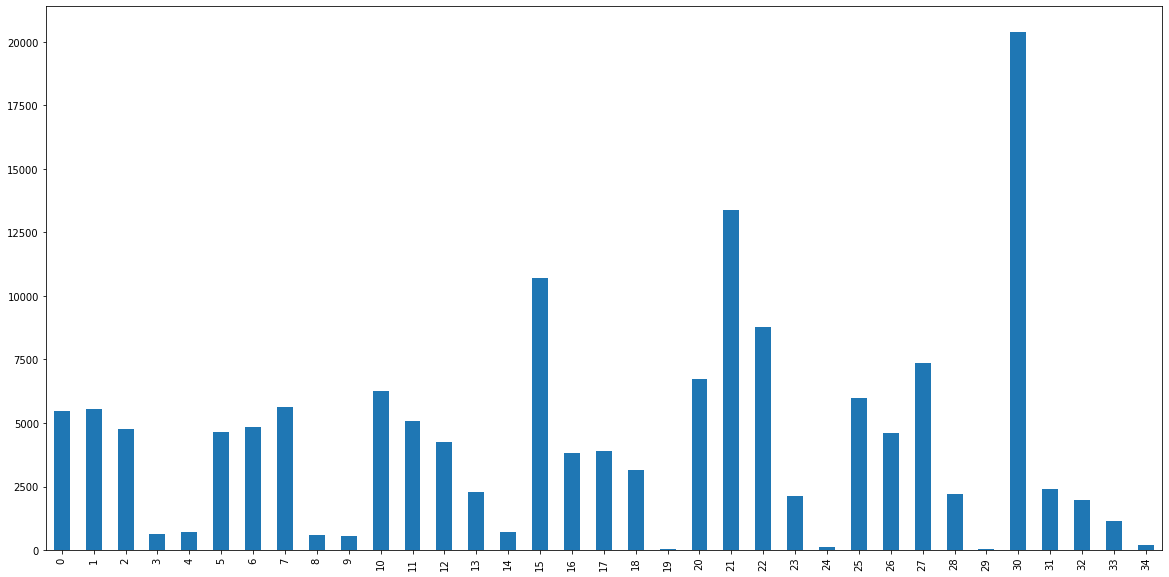

In [29]:
df_yearly_income_unit["high"].plot.bar("C1", label="high")
df_yearly_income_unit["low"].plot.bar("C2", figsize=(20,10), label="low")


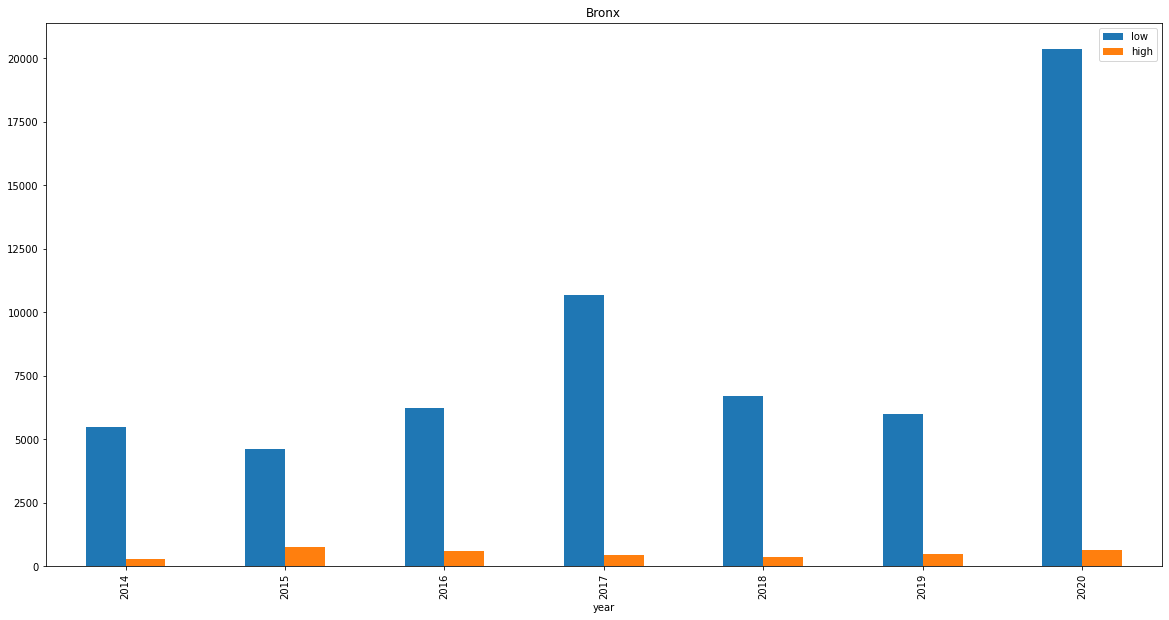

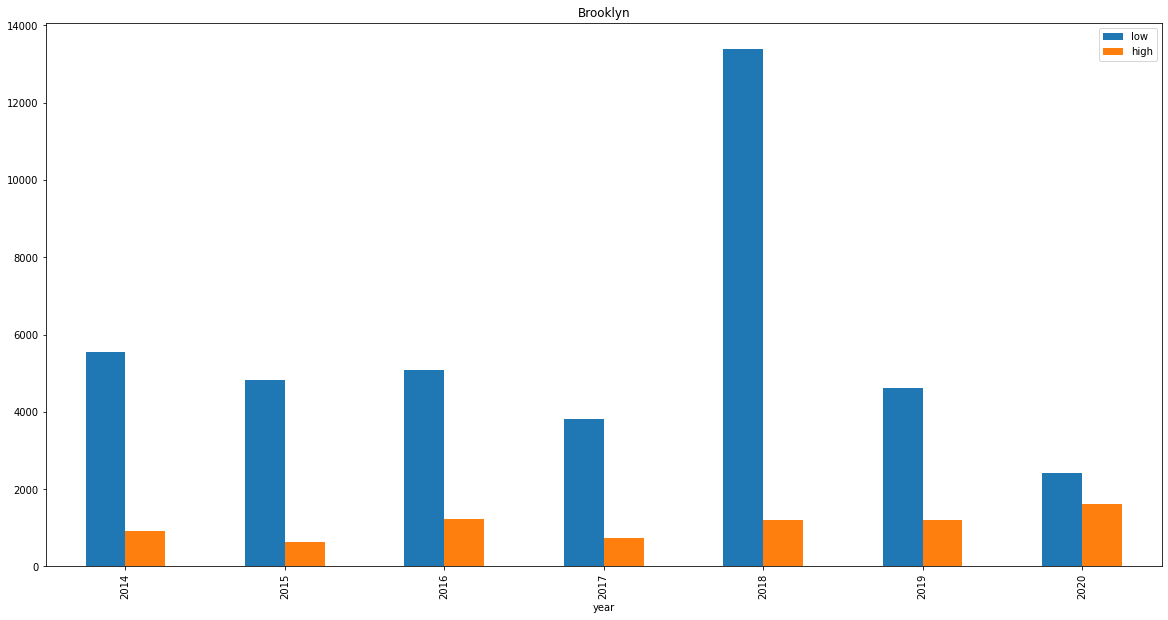

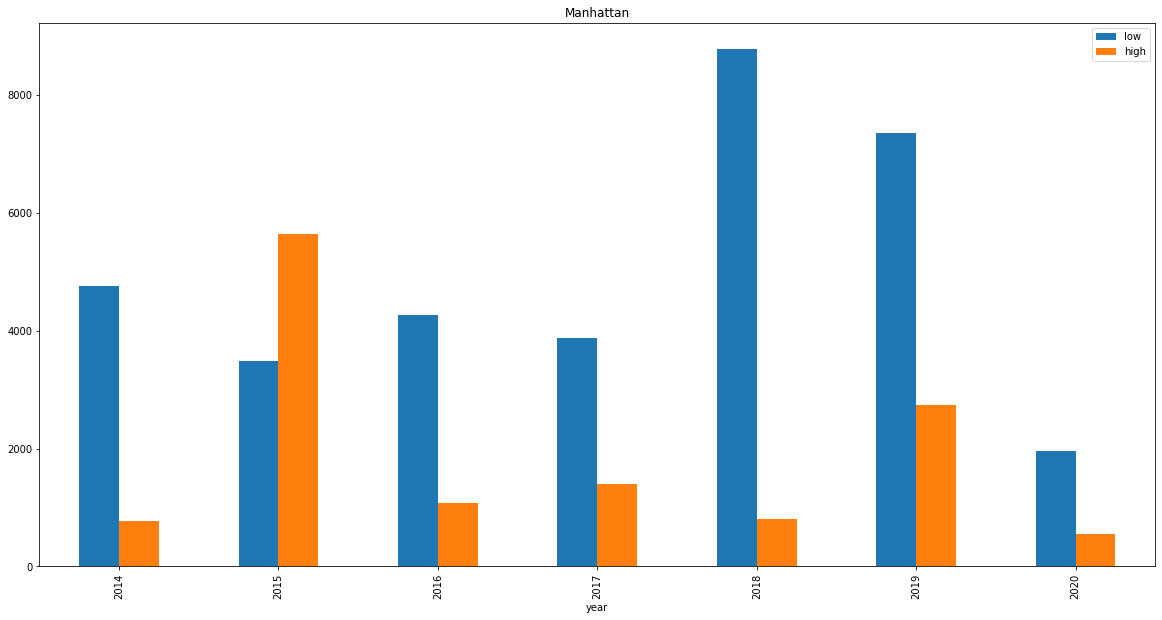

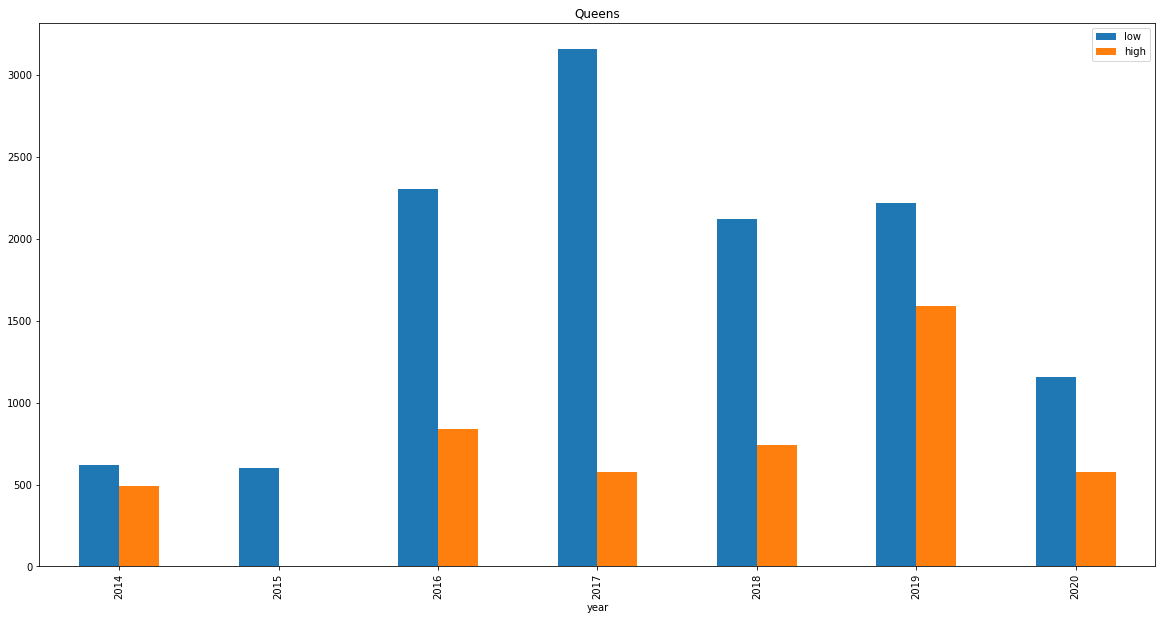

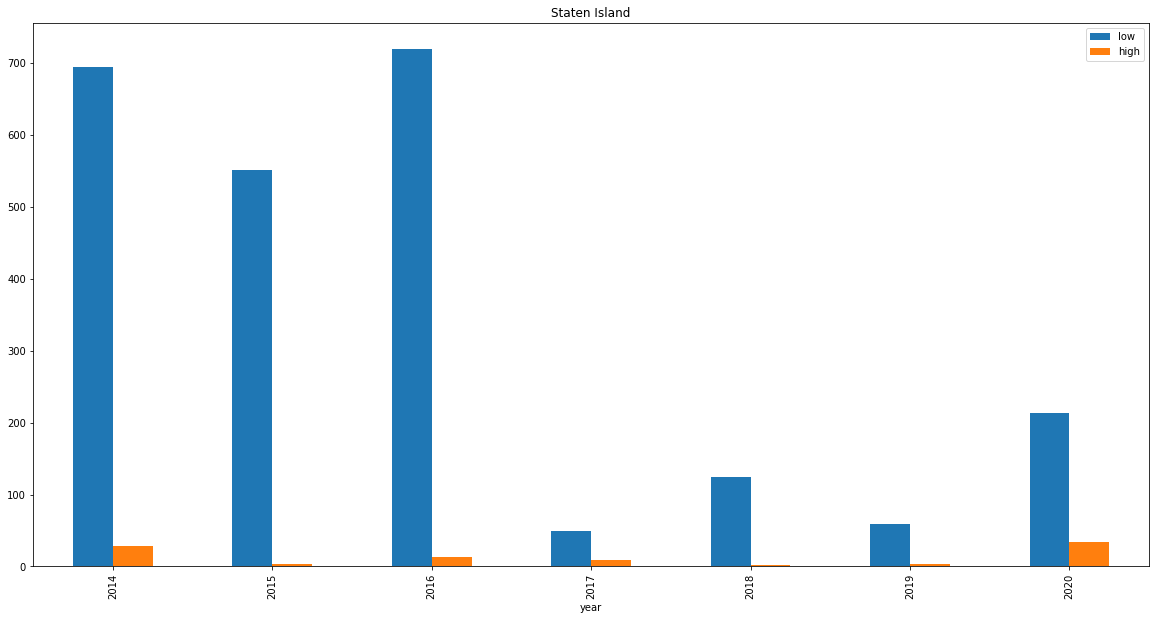

In [30]:
for borough in df_yearly_income_unit["Borough"].unique():
    df_yearly_income_unit[df_yearly_income_unit["Borough"]==borough].plot(kind="bar", figsize=(20,10),x="year", y=["low","high"], title=borough)



<AxesSubplot:xlabel='year'>

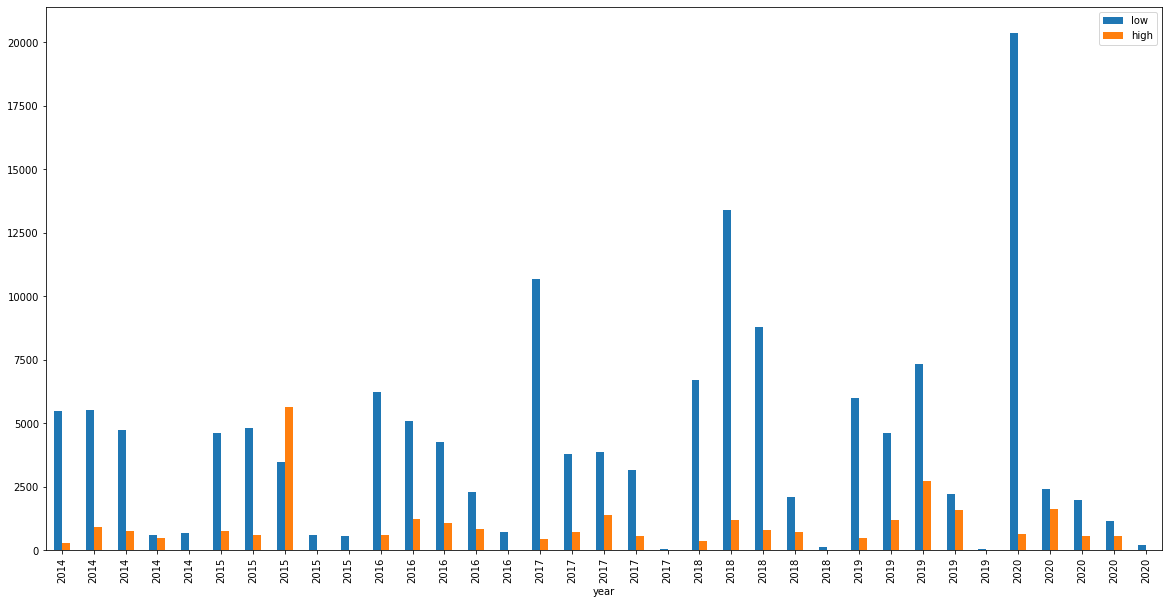

In [31]:
df_yearly_income_unit["Borough"]=df_yearly_income_unit["Borough"].astype("category")
df_yearly_income_unit=df_yearly_income_unit.reset_index().loc[:,["year","Borough", "low", "high"]]
df_yearly_income_unit.plot(kind="bar", figsize=(20,10),x="year", y=["low","high"])


In [32]:
df_income_units["Low"]=df_income_units["Extremely Low Income Units","Very Low Income Units","Low Income Units"]

NameError: name 'df_income_units' is not defined

In [35]:
import json
with open('data/rent_kaggle/socrata_metadata_housing-new-york-units-by-building.json') as json_data:
    data = json.load(json_data)



In [41]:
for row in data.values():
    print(row)

hg8x-zxpr
Housing New York Units by Building
dataset
Department of Housing Preservation and Development (HPD)
0
Housing & Development
1481654647
The Department of Housing Preservation and Development (HPD) reports on buildings, units, and projects that began after January 1, 2014 and are counted towards the Housing New York plan. The Housing New York Units by Building file presents this data by building, and includes building-level data, such as house number, street name, BBL, and BIN for each building in a project.  The unit counts are provided by building. For additional documentation, including a data dictionary, review the attachments in the “About this Dataset” section of the Primer landing page.
table
17685
False
False
True
0
33474419
official
False
1581692045
13948280
published
1615262621
d5dp-fses
16887903
0
34030
1615262618
tabular
[{'reviewedAt': 1525366174, 'reviewedAutomatically': True, 'state': 'approved', 'submissionId': 1862181, 'submissionObject': 'public_audience_reque